<a href="https://colab.research.google.com/github/jinzus/miscellaneous/blob/main/EIGENDECOMPOSITION_AND_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebooks esplores visually the geometric concepts about Eigendecomposition and Singular Value Decomposition explained in the book "Mathematics from Machine Learning" [M.P.Deisenroth,A.A.Faisal,C.S.Ong] in chapter 4.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size':12})

(-4.0, 4.0, -4.0, 4.0)

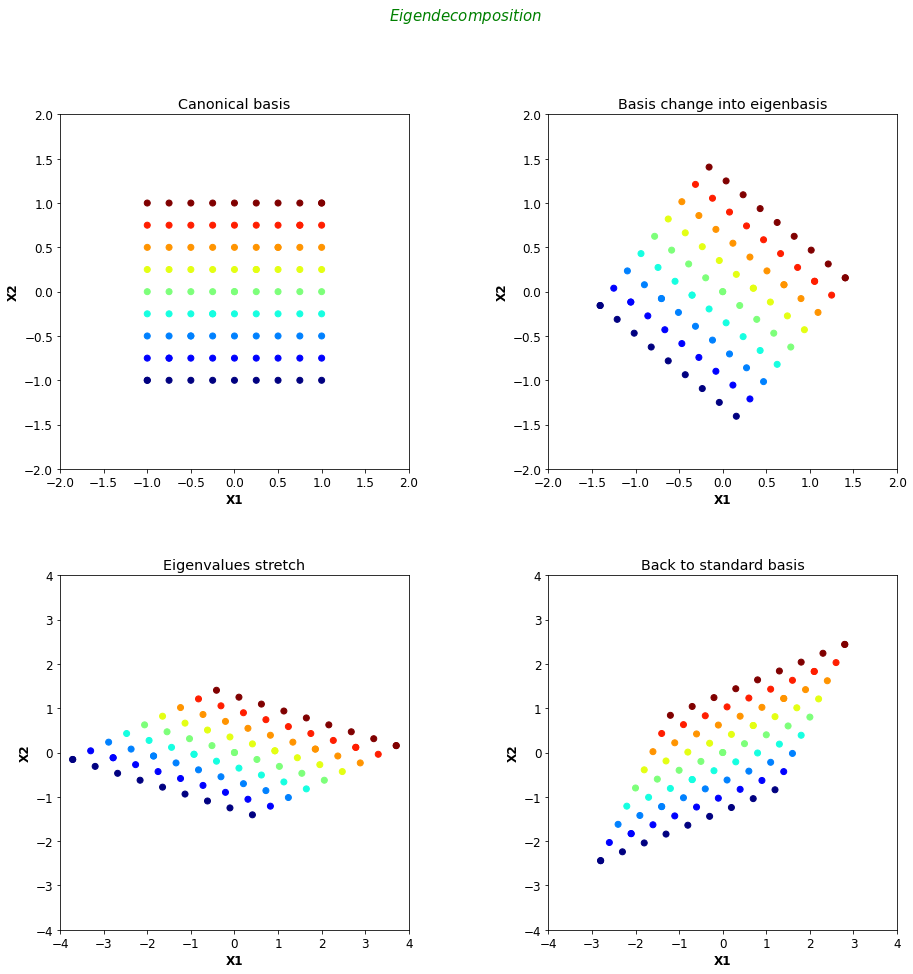

In [ ]:
# Compute eigenvalues of the transformation matrix A
A=np.array([[1,-.8],[0,1],[1,0]])
Eigvals,Eigvecs=np.linalg.eig(A.T.dot(A))
D=Eigvals
P=Eigvecs
P_1=np.linalg.inv(Eigvecs)

# Original matrix in R2
x1=np.repeat(np.arange(-4,5),10)/4
x2=np.tile(np.arange(-4,5),10)/4
X=np.c_[x1,x2]

# Perform a basis change: map the eigenvectors into the standard basis of the domain R2
X_eigenbasis=X.dot(P_1)

# Eigenvalues perform the stretch
X_stretched=X_eigenbasis*D

# Mapping back to the canonical coordinates
X_canonical_back=np.dot(X_stretched,P)


figure=plt.figure(figsize=(15,15))
plt.suptitle("$Eigendecomposition$",fontsize=15,color="g")
plt.subplots_adjust(hspace=.3,wspace=.4)
plt.subplot(221)
plt.scatter(x1,x2,cmap="jet",c=x2)
plt.title("Canonical basis")
plt.xlabel("X1",fontweight="bold")
plt.ylabel("X2",fontweight="bold")
plt.axis([-2,2,-2,2])
plt.subplot(222)
plt.scatter(X_eigenbasis[:,0],X_eigenbasis[:,1],cmap="jet",c=x2)
plt.title("Basis change into eigenbasis")
plt.xlabel("X1",fontweight="bold")
plt.ylabel("X2",fontweight="bold")
plt.axis([-2,2,-2,2])
plt.subplot(223)
plt.scatter(X_stretched[:,0],X_stretched[:,1],cmap="jet",c=x2)
plt.title("Eigenvalues stretch")
plt.xlabel("X1",fontweight="bold")
plt.ylabel("X2",fontweight="bold")
plt.axis([-4,4,-4,4])
plt.subplot(224)
plt.scatter(X_canonical_back[:,0],X_canonical_back[:,1],cmap="jet",c=x2)
plt.title("Back to standard basis")
plt.xlabel("X1",fontweight="bold")
plt.ylabel("X2",fontweight="bold")
plt.axis([-4,4,-4,4])

(-2.0, 2.0)

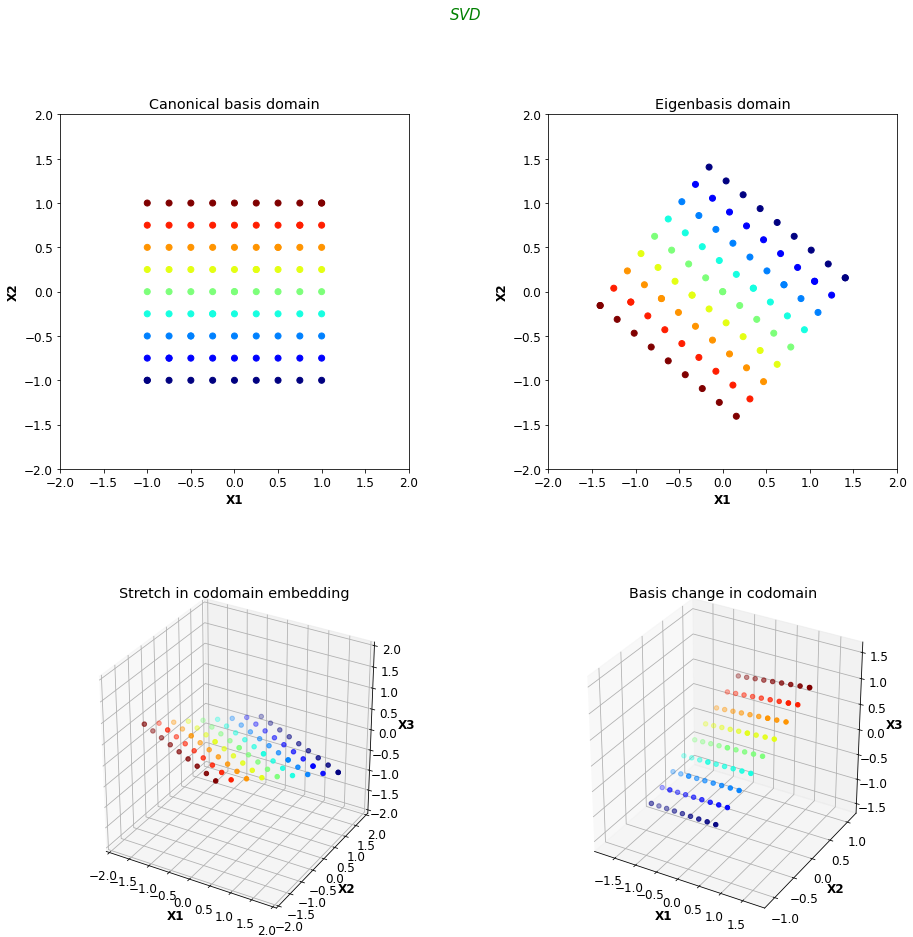

In [ ]:
# Compute SVD of the transformation matrix A
A=np.array([[1,-.8],[0,1],[1,0]])
U,S,V_t=np.linalg.svd(A)

# Perform a basis change: map the eigenvectors into the standard basis of the domain R2
X_eigenbasis=X.dot(V_t)

# Perform the stretch given by the singular values, plotted in the codomain
X_stretched=X_eigenbasis*S
X_stretched=np.c_[X_stretched,np.zeros(len(X_stretched))]

# Perform the basis change into the canconical base of the codomain
X_codomain=X_stretched.dot(U)

# Plots
axes=[-2,2,-2,2,-2,2]
fig=plt.figure(figsize=(15,15))
plt.suptitle("$SVD$",fontsize=15,color="g")
plt.subplots_adjust(hspace=.3,wspace=.4)
ax1=fig.add_subplot(221)
ax1.scatter(x1,x2,cmap="jet",c=x2)
plt.title("Canonical basis domain")
plt.axis(axes[:4])
ax1.set_xlabel("X1",fontweight="bold")
ax1.set_ylabel("X2",fontweight="bold")
ax2=fig.add_subplot(222)
ax2.scatter(X_eigenbasis[:,0],X_eigenbasis[:,1],cmap="jet",c=x2)
plt.title("Eigenbasis domain")
plt.axis(axes[:4])
ax2.set_xlabel("X1",fontweight="bold")
ax2.set_ylabel("X2",fontweight="bold")
ax3=fig.add_subplot(223,projection="3d")
ax3.scatter(X_stretched[:,0],X_stretched[:,1],X_stretched[:,2],cmap="jet",c=x2)
plt.title("Stretch in codomain embedding")
ax3.set_xlabel("X1",fontweight="bold")
ax3.set_ylabel("X2",fontweight="bold")
ax3.set_zlabel("X3",fontweight="bold")
ax3.set_xlim(axes[:2])
ax3.set_ylim(axes[2:4])
ax3.set_zlim(axes[4:])
ax4=fig.add_subplot(224,projection="3d")
ax4.scatter(X_codomain[:,0],X_codomain[:,1],X_codomain[:,2],cmap="jet",c=x2)
plt.title("Basis change in codomain")
ax4.set_xlabel("X1",fontweight="bold")
ax4.set_ylabel("X2",fontweight="bold")
ax4.set_zlabel("X3",fontweight="bold")
ax3.set_xlim(axes[:2])
ax3.set_ylim(axes[2:4])
ax3.set_zlim(axes[4:])
